<a href="https://colab.research.google.com/github/09263/Credit_Card_-Fraud_detection/blob/main/Credit_Card__Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FindDefault** **(Prediction of Credit Card fraud)**


**Problem Statement:**

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

We have to build a classification model to predict whether a transaction is fraudulent or not.


# **1)** **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

!pip install ydata_profiling
from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=9a0f89508d25f76f9907caecdd6b18c071eefd38a54e51ee4417938b37969d54
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


# **2)** **Import Dataset**

In [71]:
df=pd.read_csv(r"/content/credit card data.csv")

# **3) Exploratory Data Analysis (EDA)**

In [72]:
#Here are the few commands which will help us to understand the basic data
#The info command will help us to understand the different columns present in the dataset and its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [73]:
print("No of rows:", df.shape[0])
print("No. of cols:" ,df.shape[1])

No of rows: 284807
No. of cols: 31


In [74]:
#head command will help us understand the first five rows and all columns present in the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Description of each column:

The “Time” column specifies the time, in seconds, that a transaction was recorded over a period of 2 days.
Columns “V1” to “V28” are each different numerical features pertaining to the transaction. Extra details regarding the nature of each feature are not given to prevent confidentiality issues. Additionally, the numbers given in each of these columns have also been PCA transformed (modified using an algorithm to further ensure security).
Finally, the column “Amount” specifies how much money was involved in each transaction and “Class” denotes whether it was fraudulent or non-fraudulent (0 for non-fraudulent and 1 for fraudulent).

In [75]:
#Len command will help us understand the total number of records present in the dataset
len(df)

284807

In [76]:
#describe command will help us understand the decriptive statistics of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# To create simple report quickly
Profile = ProfileReport(df,title="Profile.Report",explorative = True)

In [58]:
Profile.to_widgets()

In [59]:
Profile.to_file("/content/credit card data.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 4) Data Cleaning

A crucial step before devising a solution for a ML problem is to first better understand the data. This is because datasets often have flaws, such as being imbalanced, containing invalid data, and having missing fields. Therefore, these issues must be addressed in the preprocessing stage before any models are built.

In [77]:
# Determine number of fraud and non-fraud cases in dataset
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


In [78]:
#find % values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

Obviously, this is an incredibly unbalanced dataset as only a minute fraction of all entries are fraudulent transactions. If a model is trained on this, it can exhibit unpredictable behaviour because it simply does not have enough fraudulent transaction examples to learn from. Therefore, this is an area to address during preprocessing.



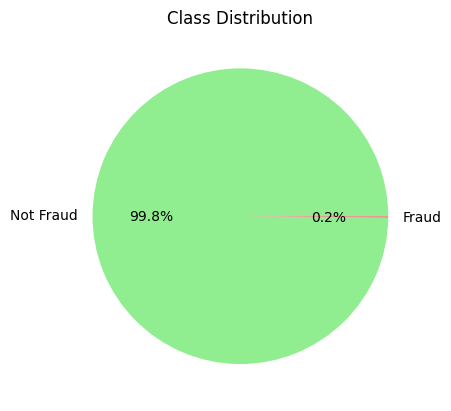

In [79]:
# pie chart for class distribution

# Create a pie chart for the class distribution
labels = ['Not Fraud', 'Fraud']
sizes = [df[df['Class'] == 0].shape[0], df[df['Class'] == 1].shape[0]]
colors = ['lightgreen', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()


If a dataset has any empty values, these must addressed before model training. Often, any such null values are filled with the average of the other values in the same column.
We can check for null values by running the following line:

In [80]:
# Check for missing values in the dataframe
print('Missing Values:')
print(df.isnull().sum())

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


We have no null values, which is great — a headache dodged.

In [81]:
#check out the duplicates

duplicate = df[df.duplicated()]

print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [82]:
unique_values = df.nunique()

# Create a DataFrame to store the unique values
unique_values_df = pd.DataFrame({'Column': unique_values.index, 'Unique Values': unique_values.values})

# Sort the DataFrame by the number of unique values (descending order)
unique_values_df = unique_values_df.sort_values(by='Unique Values', ascending=False)

# Display the DataFrame
print(unique_values_df)

    Column  Unique Values
3       V3         275657
5       V5         275657
13     V13         275657
9       V9         275656
2       V2         275655
18     V18         275655
12     V12         275654
4       V4         275654
15     V15         275653
1       V1         275653
14     V14         275653
6       V6         275652
7       V7         275651
11     V11         275648
26     V26         275647
10     V10         275646
17     V17         275646
24     V24         275645
19     V19         275645
16     V16         275645
22     V22         275644
8       V8         275643
25     V25         275640
20     V20         275632
21     V21         275617
23     V23         275611
27     V27         275597
28     V28         275558
0     Time         124592
29  Amount          32767
30   Class              2


# 5)	Dealing with Imbalanced data

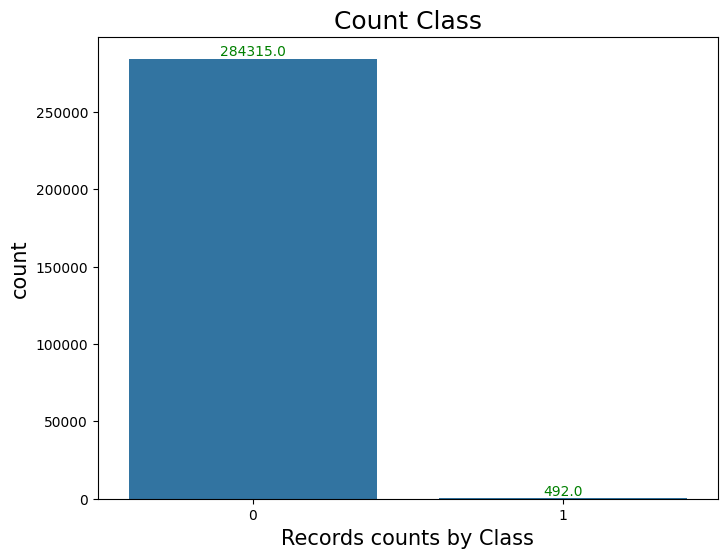

In [83]:
# Creating a bar plot and percentage of fraudent vs non fraudent transaction
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='Class')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='green', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count Class', fontsize= 18)
plt.xlabel("Records counts by Class",fontsize= 15)
plt.ylabel("count", fontsize= 15)
plt.show()

In [84]:
# Checking correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
V3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
V5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
V6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
V7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
V8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875
V9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,...,3.040326e-12,-7.467526e-13,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733


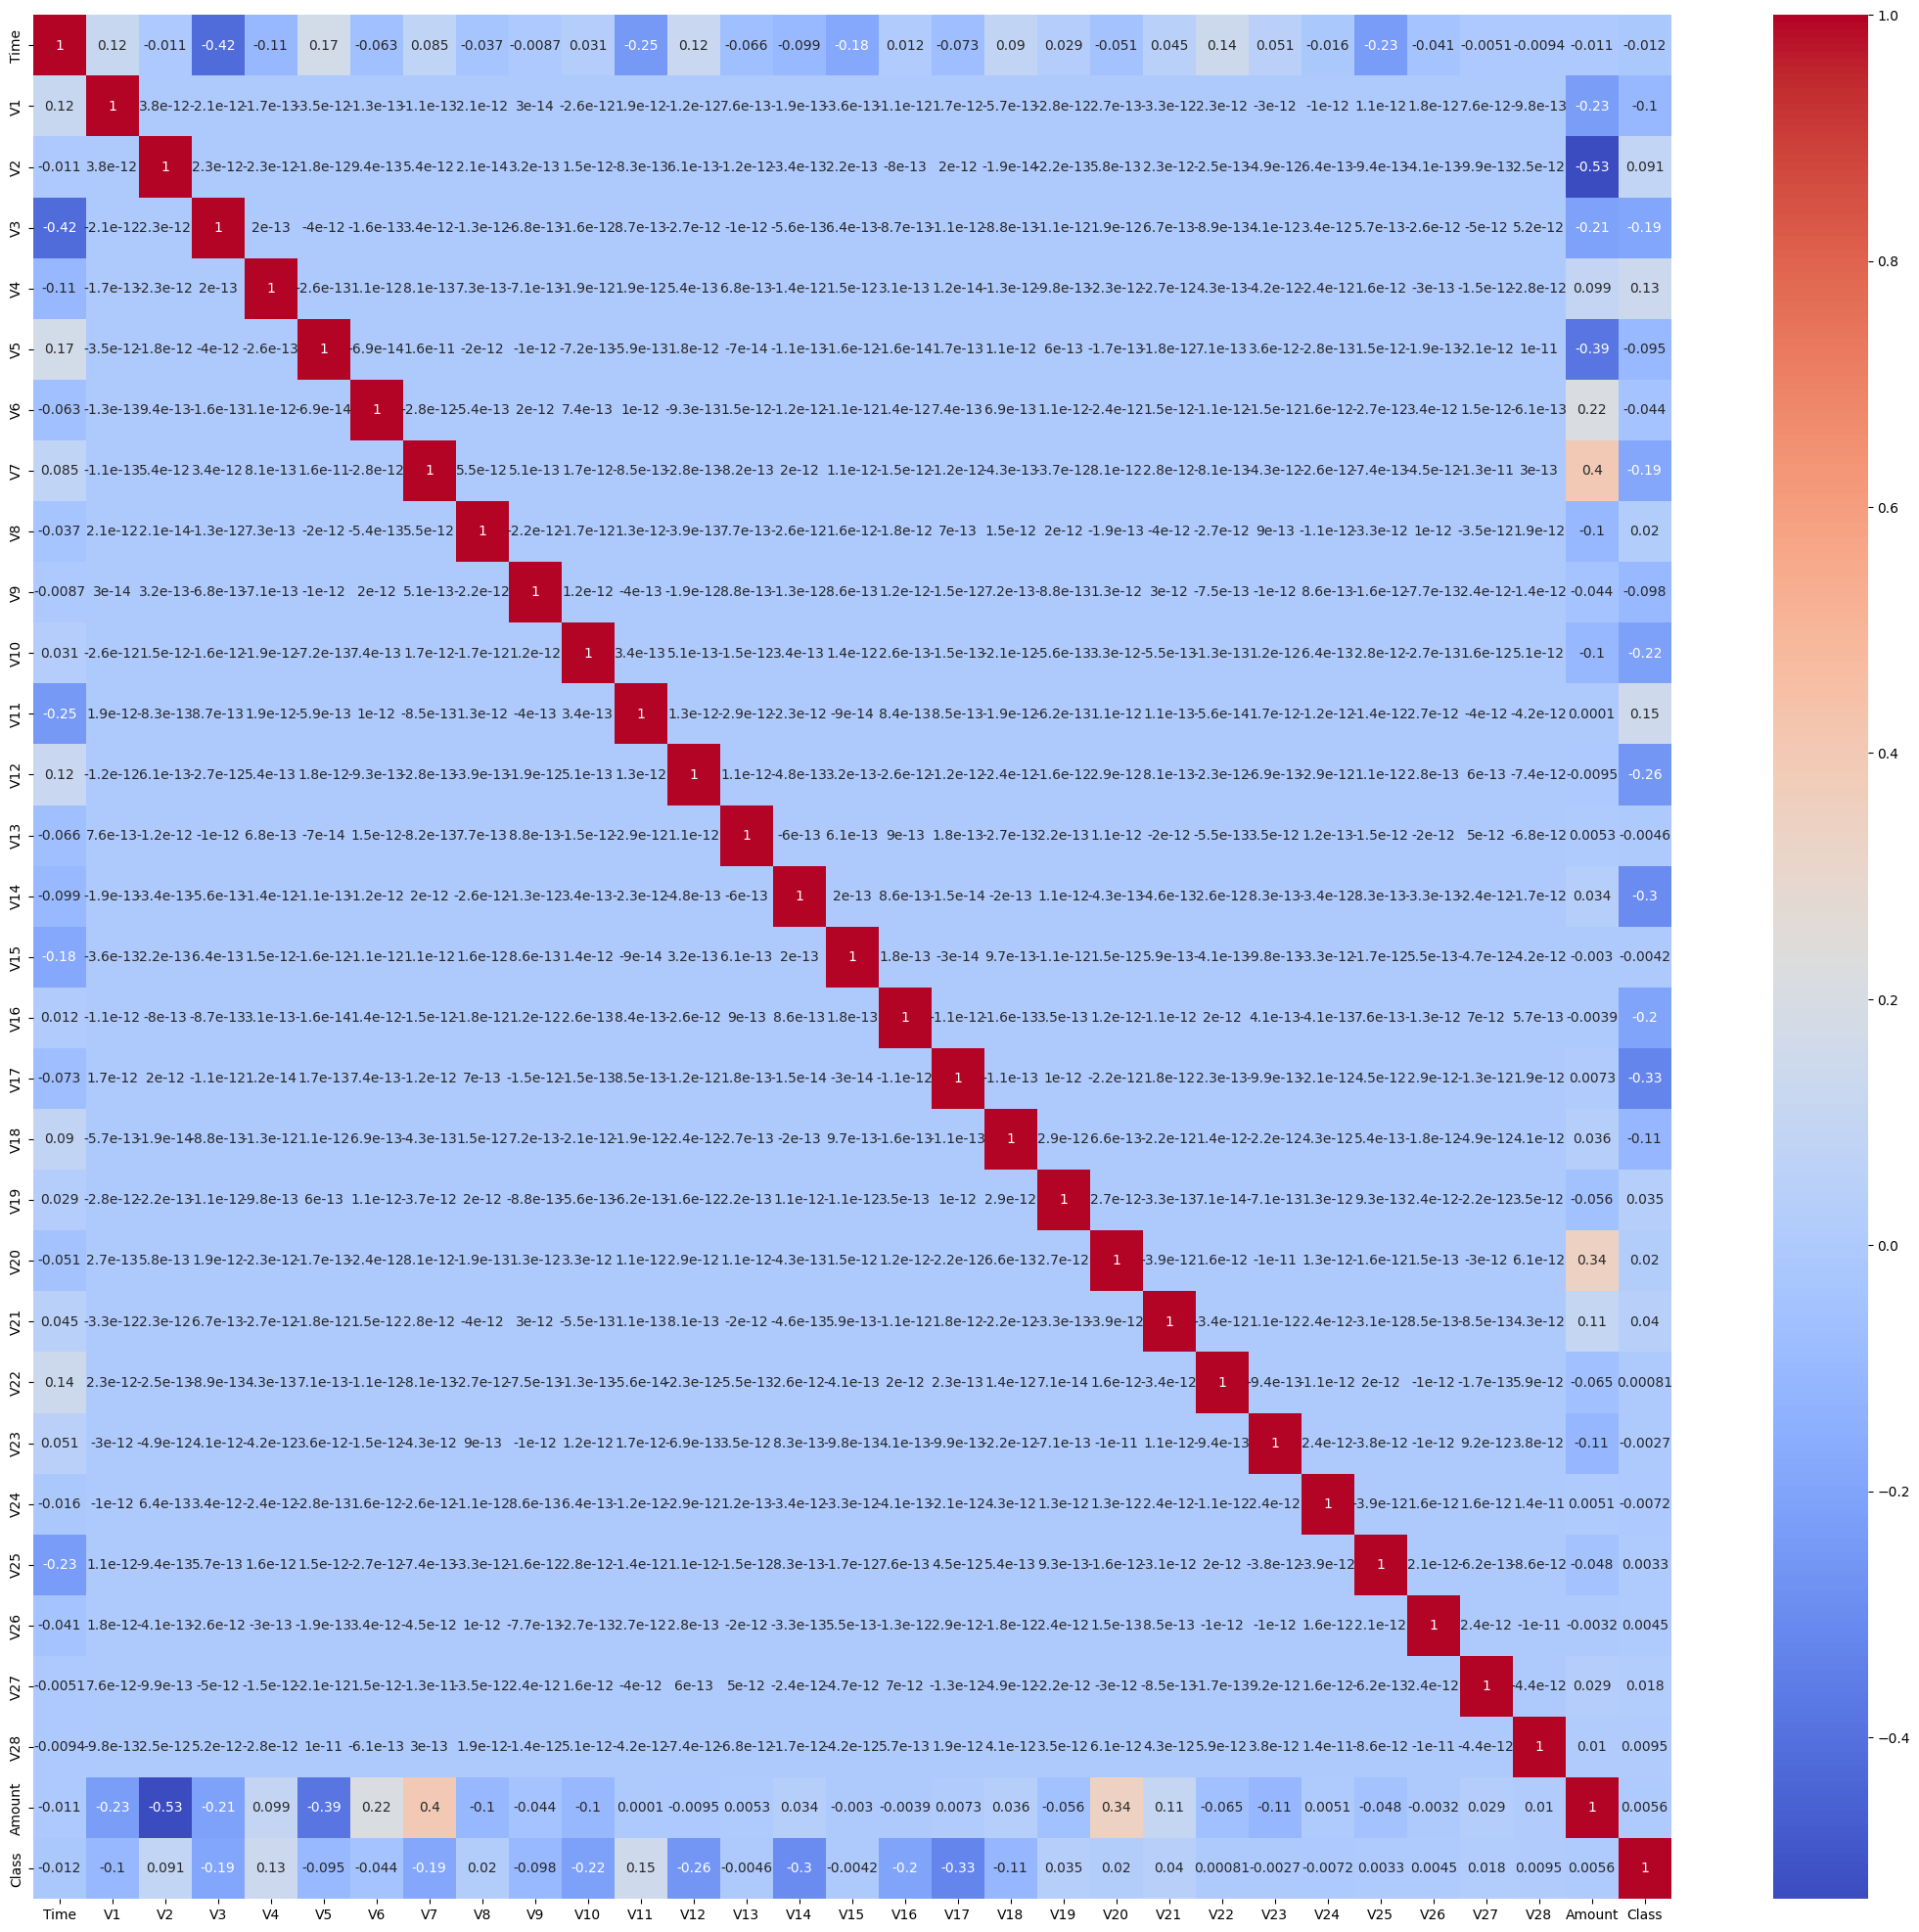

In [85]:
# Checking correlation with heatmap
plt.figure(figsize=(27,25))
sns.heatmap(corr ,cmap='coolwarm' , annot = True)
plt.show()

# 6)	Feature Engineering and Scaling

# Scaling Check
One possible area of concern I noticed when printing the top of the dataset was the wide gap between values in the “Amount” column. To check if this is a trend across the dataset, we can utilize the describe function in the Pandas library.

In [86]:
print('Non-Fraudulent transactions "Amount" column statistics:')
print (df[df.Class==0]['Amount'].describe())
print('Fraudulent transactions "Amount" column statistics:')
print (df[df.Class==1]['Amount'].describe())

Non-Fraudulent transactions "Amount" column statistics:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
Fraudulent transactions "Amount" column statistics:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


The high standard deviation and large difference between 25th, 50th, and 75th percentiles mean that this column has a wide range in values and should be scaled in the preprocessing stage.

In [87]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Redundant Features
Finally, the “Time” column is redundant because it offers no insight into the data — it's just an arbitrary data point. For this reason, the column can be removed before building any models.

In [88]:
df.drop("Time", axis=1, inplace=True)

In [89]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Next, lets scale the “Amount” column. We can use the StandardScaler class from sklearn.

In [90]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
df['Amount'] = s.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

Finally, we have to deal with the inherent imbalance in our dataset. This is a great time to introduce a crucial concept applicable in a wide variety of ML problems — overfitting vs underfitting.

In our dataset, the vast majority of non-fraudulent cases could cause overfitting, where a model will follow the trend of the dataset and assume that fraudulent cases are close to non-existent in the real world — which is wrong.

One way to approach this issue is by taking a sub-sample of the dataset where the number of fraudulent and non-fraudulent entries are equal. This can be done through a technique called Random Under-Sampling.

In [91]:
df = df.sample(frac=1)
num_fraud = len(df[df.Class == 1])
fraud_entries = df[df.Class == 1]
non_fraud_entries = df[df['Class'] == 0][:num_fraud]
random_undersampled_df = pd.concat([fraud_entries, non_fraud_entries])
random_undersampled_df = random_undersampled_df.sample(frac=1, random_state=42)
new_df = random_undersampled_df
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82385,-0.985432,0.722411,1.893088,-0.427710,-0.030207,-0.270224,0.532967,0.089023,0.002660,-0.573840,...,0.045297,0.125849,-0.292926,0.358618,0.209355,0.211672,-0.248813,0.100047,-0.313249,0
33276,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,-0.304013,1
189193,-0.797260,0.941380,3.453632,4.614116,-0.316925,2.375467,-0.625572,0.473297,-0.009241,1.549362,...,-0.071356,0.717273,-0.394737,-0.593868,0.336751,0.694212,0.403687,0.000198,-0.303413,0
6338,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,-4.959493,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,-0.349231,1
199896,-1.212682,-2.484824,-6.397186,3.670562,-0.863375,-1.855855,1.017732,-0.544704,-1.703378,-3.739659,...,1.396872,0.092073,-1.492882,-0.204227,0.532511,-0.293871,0.212663,0.431095,4.984216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30442,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,-6.600461,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,-0.334998,1
137705,-1.464897,1.975528,-1.077145,2.819191,0.069850,-0.789044,-1.196101,0.673654,-1.363724,-2.932895,...,0.174099,-0.272505,-0.031549,-0.406166,0.157769,-0.104393,0.073796,-0.041570,-0.349231,1
35903,1.013130,-0.463272,1.287564,0.786830,-1.112856,0.377541,-0.869288,0.416375,0.859580,-0.096032,...,0.026352,0.133558,0.051095,0.243026,0.073225,0.332632,0.017087,0.019389,-0.182511,0
249167,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,-4.441484,...,1.191175,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,5.663610,1


Finally, lets do a quick check to see that our sub-sample has an equal number of fraudulent and non fraudulent entries.

In [92]:
print(new_df['Class'].value_counts()/len(new_df))

Class
0    0.5
1    0.5
Name: count, dtype: float64


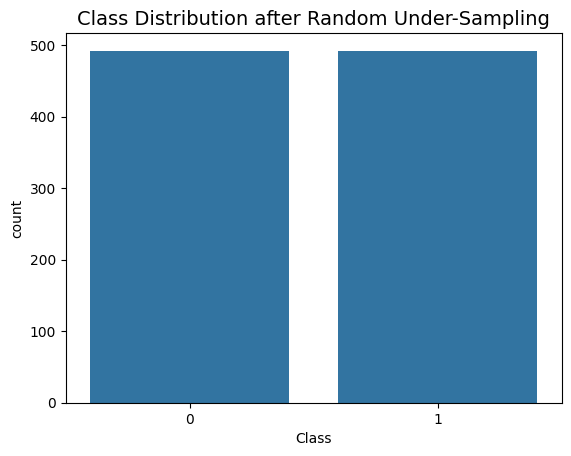

In [93]:
# Create a countplot for the Class column after random under-sampling
sns.countplot(data=new_df, x='Class')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='green', xytext=(0, 5),
                textcoords='offset points')

plt.title('Class Distribution after Random Under-Sampling', fontsize=14)
plt.show()


# 7)	Model Selection and Model Training

Building Classification Models:

We will build a variety of classification models in this section and then test them out individually to see which are the best suited for this task.

First, we will use train_test_split to split our sub-sample dataset into a training and test set.

In [94]:
from sklearn.model_selection import train_test_split
x = new_df.drop("Class", axis=1)
y = new_df["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Next, we will initialize and train each of our models on the training set.

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [96]:
# Decision Tree
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [97]:
#Random Forest Tree
rf = RandomForestClassifier(max_depth = 4)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [98]:
#K-Nearest Neighbors
k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [99]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

Finally, lets check out the training score of our model. We will do this through a technique called **cross validation**.

 In this technique, the training dataset is split into k subsets of equal size and the model is trained on all but one of the subsets. The remaining subset acts as a test set and is given to the model to evaluate accuracy. This process is repeated until all of the subsets have been given as a test set once and the average of all the accuracies is returned.

In [100]:
from sklearn.model_selection import cross_val_score
print('Training score of the Decision Tree model is {}'.format(cross_val_score(tree_model, x_train, y_train, cv=5).mean()))
print('Training score of the KNN model is {}'.format(cross_val_score(knn, x_train, y_train, cv=5).mean()))
print('Training score of the Logistic Regression model is {}'.format(cross_val_score(lr, x_train, y_train, cv=5).mean()))
print('Training score of the Random Forest Tree model is {}'.format(cross_val_score(rf, x_train, y_train, cv=5).mean()))

Training score of the Decision Tree model is 0.9275900991695558
Training score of the KNN model is 0.9441022333306458
Training score of the Logistic Regression model is 0.9542933161331938
Training score of the Random Forest Tree model is 0.9402967024107072


Looks like the **Logistic Regression** model performed best during training.

# 8)	Model Validation/	Hyperparameter Tuning

Evaluating the Models Using Common Metrics.

Our models will be evaluated using the **accuracy score** , 	**ROC-AUC Curve** , **Precision** , **Recall** **(Sensitivity)** ,	**F1 Score**  and **confusion matrix**.

We will evaluate our model on two test sets — one from our sub-sampled dataset and one from the original dataset. This is to get a better idea of the model’s performance when the data is imbalanced.

We can generate a test set for our original dataset by using train_test_split.

In [101]:
ox = df.drop("Class", axis=1)
oy = df["Class"]
ox_train, ox_test, oy_train, oy_test = train_test_split(ox, oy, test_size=0.2, random_state=42)

**Accuracy**:

We will use the accuracy_score function from sklearn.

In [102]:
from sklearn.metrics import  accuracy_score
print('Accuracy score of the Decision Tree model on the sub-sampled test set is {}'.format(accuracy_score(y_test, tree_model.predict(x_test))))

Accuracy score of the Decision Tree model on the sub-sampled test set is 0.9035532994923858


In [103]:
print('Accuracy score of the KNN model on the sub-sampled test set is {}'.format(accuracy_score(y_test, knn.predict(x_test))))

Accuracy score of the KNN model on the sub-sampled test set is 0.9187817258883249


In [104]:
print('Accuracy score of the Logistic Regression model on the sub-sampled test set is {}'.format(accuracy_score(y_test, lr.predict(x_test))))

Accuracy score of the Logistic Regression model on the sub-sampled test set is 0.9086294416243654


In [105]:
print('Accuracy score of the Random Forest Tree model on the sub-sampled test set is {}'.format(accuracy_score(y_test, rf.predict(x_test))))

Accuracy score of the Random Forest Tree model on the sub-sampled test set is 0.9086294416243654


In [106]:
print('Accuracy score of the Decision Tree model on the original test set is {}'.format(accuracy_score(oy_test, tree_model.predict(ox_test))))

Accuracy score of the Decision Tree model on the original test set is 0.9372213054316914


In [107]:
print('Accuracy score of the KNN model on the original test set is {}'.format(accuracy_score(oy_test, knn.predict(ox_test))))

Accuracy score of the KNN model on the original test set is 0.9704364313050806


In [108]:
print('Accuracy score of the Logistic Regression model on the original test set is {}'.format(accuracy_score(oy_test, lr.predict(ox_test))))

Accuracy score of the Logistic Regression model on the original test set is 0.9590428706857203


In [109]:
print('Accuracy score of the Random Forest Tree model on the original test set is {}'.format(accuracy_score(oy_test, rf.predict(ox_test))))

Accuracy score of the Random Forest Tree model on the original test set is 0.9834275481900214


# As we can see, the **KNN** model scored highest on the sub-sampled dataset** (~92%) and the** **Random Forest Tree** Model scored highest on the original test set** (98%).



**ROC-AUC Curve** :

Now ,We will use the roc_auc_score function from sklearn.


In [47]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression on the sub-sampled test set is {}'.format(roc_auc_score(y_test, lr.predict(x_test))))
print('Logistic Regression on the original test set is {}'.format(roc_auc_score(oy_test, lr.predict(ox_test))))
print('KNN Neighbors on the sub-sampled test set is {}'.format(roc_auc_score(y_test, knn.predict(x_test))))
print('KNN Neighbors on the original test set is {}'.format(roc_auc_score(oy_test, knn.predict(ox_test))))
print('Random Forest Tree model on the sub-sampled test set is {}'.format(roc_auc_score(y_test,rf.predict(x_test))))
print('Random Forest Tree model on the original test set is {}'.format(roc_auc_score(oy_test,rf.predict(ox_test))))
print('Decision Tree Classifier on the sub-sampled test set is {}'.format(roc_auc_score(y_test, tree_model.predict(x_test))))
print('Decision Tree Classifier on the original test set is {}'.format(roc_auc_score(oy_test,tree_model.predict(ox_test))))

# Again, we can see, the **Logistic Regression** model scored highest on the sub-sampled dataset** (~95%) and the** **Random Forest Tree** Model scored highest on the original test set** (94%).

In [111]:
from sklearn.metrics import f1_score, recall_score
f1_score = f1_score(y_test, lr.predict(x_test))
recall_score = recall_score(y_test, lr.predict(x_test))
print("Sensitivity/Recall for Logistic Regression Model on sub_sampled test is: {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model on sub_sampled test is : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model on sub_sampled test is: 0.8818181818181818
F1 Score for Logistic Regression Model on sub_sampled test is : 0.9150943396226415


In [112]:
from sklearn.metrics import f1_score, recall_score
f1_score = f1_score(y_test, knn.predict(x_test))
recall_score = recall_score(y_test, knn.predict(x_test))
print("Sensitivity/Recall for knn Model on sub_sampled test is: {recall_score}".format(recall_score = recall_score))
print("F1 Score for knn Model on sub_sampled test is : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for knn Model on sub_sampled test is: 0.8727272727272727
F1 Score for knn Model on sub_sampled test is : 0.923076923076923


In [113]:
from sklearn.metrics import f1_score, recall_score
f1_score = f1_score(y_test, rf.predict(x_test))
recall_score = recall_score(y_test, rf.predict(x_test))
print("Sensitivity/Recall for Random forest Model on sub_sampled test is: {recall_score}".format(recall_score = recall_score))
print("F1 Score for Random forest Model on sub_sampled test is : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Random forest Model on sub_sampled test is: 0.8545454545454545
F1 Score for Random forest Model on sub_sampled test is : 0.912621359223301


In [114]:
from sklearn.metrics import f1_score, recall_score
f1_score = f1_score(y_test, tree_model.predict(x_test))
recall_score = recall_score(y_test, tree_model.predict(x_test))
print("Sensitivity/Recall for Decision tree Model on sub_sampled test is: {recall_score}".format(recall_score = recall_score))
print("F1 Score for Decision tree Model on sub_sampled test is : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Decision tree Model on sub_sampled test is: 0.8909090909090909
F1 Score for Decision tree Model on sub_sampled test is : 0.9116279069767442


# Now, we can see, the **Decision Tree** model scored highest on the sub-sampled dataset** i.e. 89% for sensitivity and **KNN** model scored highest on the sub-sampled dataset i.e. 92% for F1

In [115]:
from sklearn.metrics import f1_score, recall_score
f1_score = f1_score(oy_test, lr.predict(ox_test))
recall_score = recall_score(oy_test, lr.predict(ox_test))
print("Sensitivity/Recall for Logistic Regression Model on the original test is: {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model on the original test is : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model on the original test is: 0.9439252336448598
F1 Score for Logistic Regression Model on the original test is : 0.0796844181459566


In [116]:
from sklearn.metrics import f1_score, recall_score
f1_score = f1_score(oy_test, knn.predict(ox_test))
recall_score = recall_score(oy_test, knn.predict(ox_test))
print("Sensitivity/Recall for knn Model on the original test is: {recall_score}".format(recall_score = recall_score))
print("F1 Score for knn Model on the original test is : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for knn Model on the original test is: 0.9252336448598131
F1 Score for knn Model on the original test is : 0.10520722635494155


In [117]:
from sklearn.metrics import f1_score, recall_score
f1_score = f1_score(oy_test, rf.predict(ox_test))
recall_score = recall_score(oy_test, rf.predict(ox_test))
print("Sensitivity/Recall for Random forest Model on the original test is: {recall_score}".format(recall_score = recall_score))
print("F1 Score for Random forest Model on the original test is : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Random forest Model on the original test is: 0.9252336448598131
F1 Score for Random forest Model on the original test is : 0.17338003502626975


In [118]:
from sklearn.metrics import f1_score, recall_score
f1_score = f1_score(oy_test, tree_model.predict(ox_test))
recall_score = recall_score(oy_test, tree_model.predict(ox_test))
print("Sensitivity/Recall for Decision tree Model on the original test is: {recall_score}".format(recall_score = recall_score))
print("F1 Score for Decision tree Model on the original test is : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Decision tree Model on the original test is: 0.9252336448598131
F1 Score for Decision tree Model on the original test is : 0.05246422893481717


we can see, the **Logistic Regression** model has highest **senstivity** score on the original dataset** i.e. **(~94%)**  and  **Random Forest tree** model has highest **F1** score on the original dataset i.e. **17%**

In [119]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, lr.predict(x_test)))

print('KNN:')
print(classification_report(y_test, knn.predict(x_test)))

print('Decision Tree Model')
print(classification_report(y_test, tree_model.predict(x_test)))

print('Random Forest Tree:')
print(classification_report(y_test, rf.predict(x_test)))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        87
           1       0.95      0.88      0.92       110

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

KNN:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91        87
           1       0.98      0.87      0.92       110

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

Decision Tree Model
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        87
           1       0.93      0.89      0.91       110

    accuracy                           0.90       197
   macro avg       0.90      0.91      0.90       197
weighted avg       0.91     

Confusion Matrix

We will use the confusion_matrix function from sklearn and create a heatmap using seaborn.

I will show how to create a confusion matrix for the** Logistic Regression** model on the sub-sampled test set and the **Random Forest Tree **Model on the original test set.

In [120]:
from sklearn.metrics import confusion_matrix

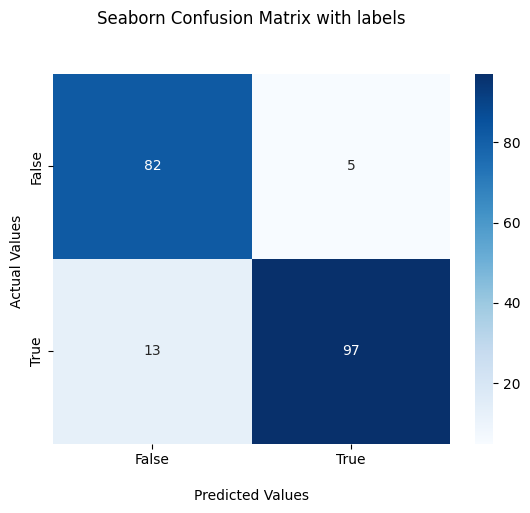

In [121]:
m = confusion_matrix(y_test, lr.predict(x_test))
ax = sns.heatmap(m, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

We can quickly analyze the false positives and negatives that our model outputted using the confusion matrix. Taking the top row, it looks like we had 82+5 = 87 total non fraudulent test cases in the test set. Of these, the model correctly predicted 82. Therefore, it has an

**accuracy of ~94% for non-fraudulent**
test cases in this set.

On the second row, we had 13+97 = 110 fraudulent test cases in the test set. Of these, the model correctly predicted 97. In this way, it has an

**accuracy of ~88% for fraudulent**

test cases in this set.

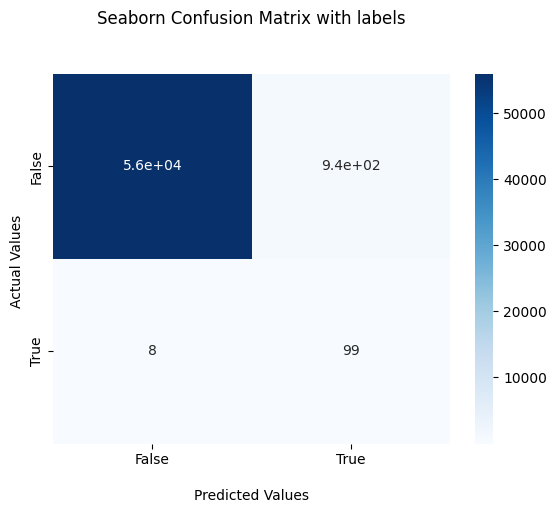

In [122]:
m = confusion_matrix(oy_test, rf.predict(ox_test))
ax = sns.heatmap(m, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

We can quickly analyze the false positives and negatives that our model outputted using the confusion matrix. Taking the top row, it looks like we had 56000 + 940 = 56940 total non fraudulent test cases in the original test set. Of these, the model correctly predicted 56000. Therefore, it has an

**accuracy of ~98% for non-fraudulent**

test cases in this set.

On the second row, we had 8 + 99 = 107 fraudulent test cases in the original test set. Of these, the model correctly predicted 99. In this way, it has an

**accuracy of ~93% for fraudulent**

test cases in this set.

# Conclusion: Hence, we can say that Random Forest model performed best with an accuracy score of 98% for the detection of fraudulent and 93% for the detection of  non-fraudulent transactions.

In [57]:
#Thank you.